In [2]:
from get_true_bvs import *
from read_surge import *
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import datetime as dt
from datetime import datetime
from scipy.stats import linregress
import pandas as pd

In [3]:
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams["figure.figsize"] = [3, 3]
plt.rcParams['font.size'] = 12

In [4]:
surgefile = read_surge(dt.datetime(1980,1,1),dt.datetime(2021,12,31,23))

reading surge for  1980
next date is 1981-01-01 00:30:00
reading surge for  1981
next date is 1982-01-01 00:30:00
reading surge for  1982
next date is 1983-01-01 00:30:00
reading surge for  1983
next date is 1984-01-01 00:30:00
reading surge for  1984
next date is 1985-01-01 00:30:00
reading surge for  1985
next date is 1986-01-01 00:30:00
reading surge for  1986
next date is 1987-01-01 00:30:00
reading surge for  1987
next date is 1988-01-01 00:30:00
reading surge for  1988
next date is 1989-01-01 00:30:00
reading surge for  1989
next date is 1990-01-01 00:30:00
reading surge for  1990
next date is 1991-01-01 00:30:00
reading surge for  1991
next date is 1992-01-01 00:30:00
reading surge for  1992
next date is 1993-01-01 00:30:00
reading surge for  1993
next date is 1994-01-01 00:30:00
reading surge for  1994
next date is 1995-01-01 00:30:00
reading surge for  1995
next date is 1996-01-01 00:30:00
reading surge for  1996
next date is 1997-01-01 00:30:00
reading surge for  1997
next da

In [5]:
cross_wspeed = surgefile[4]
merid_wspeed = surgefile[5]
easterly_wspeed =surgefile[6]
time = surgefile[3]

In [6]:
time = [datetime.strptime(str(time[n]),'%Y-%m-%d %H:%M:%S') for n in range(0,7654)]
time = pd.DatetimeIndex(time)

In [7]:
year, counts = np.unique(time.year, return_counts = True)

In [8]:
yearlycross = []
yearlymerid = []
yearlyeasterly = []

current_index = 0

for length in counts:
    
    yearlycross.append(np.mean(cross_wspeed[current_index:current_index + length]))
    yearlymerid.append(np.mean(merid_wspeed[current_index:current_index + length]))
    yearlyeasterly.append(np.mean(easterly_wspeed[current_index:current_index + length]))
        
    current_index += length

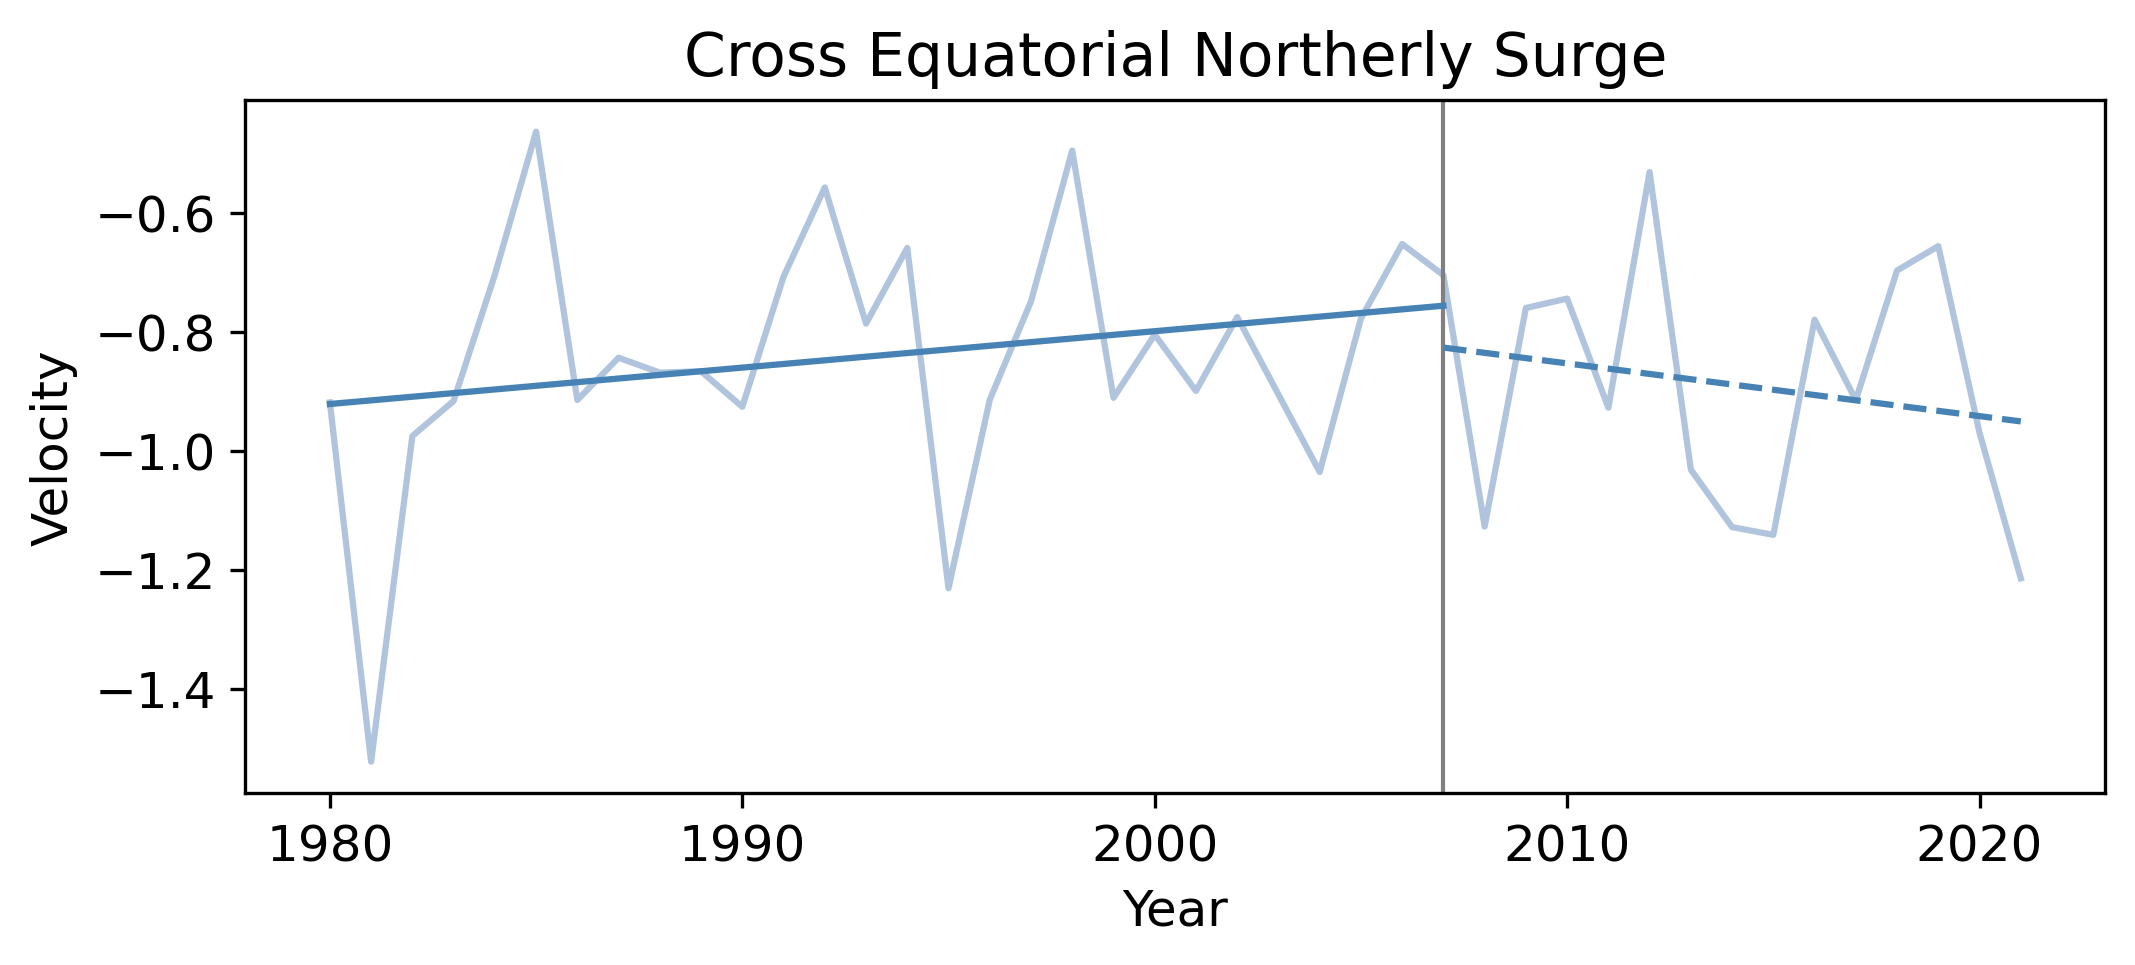

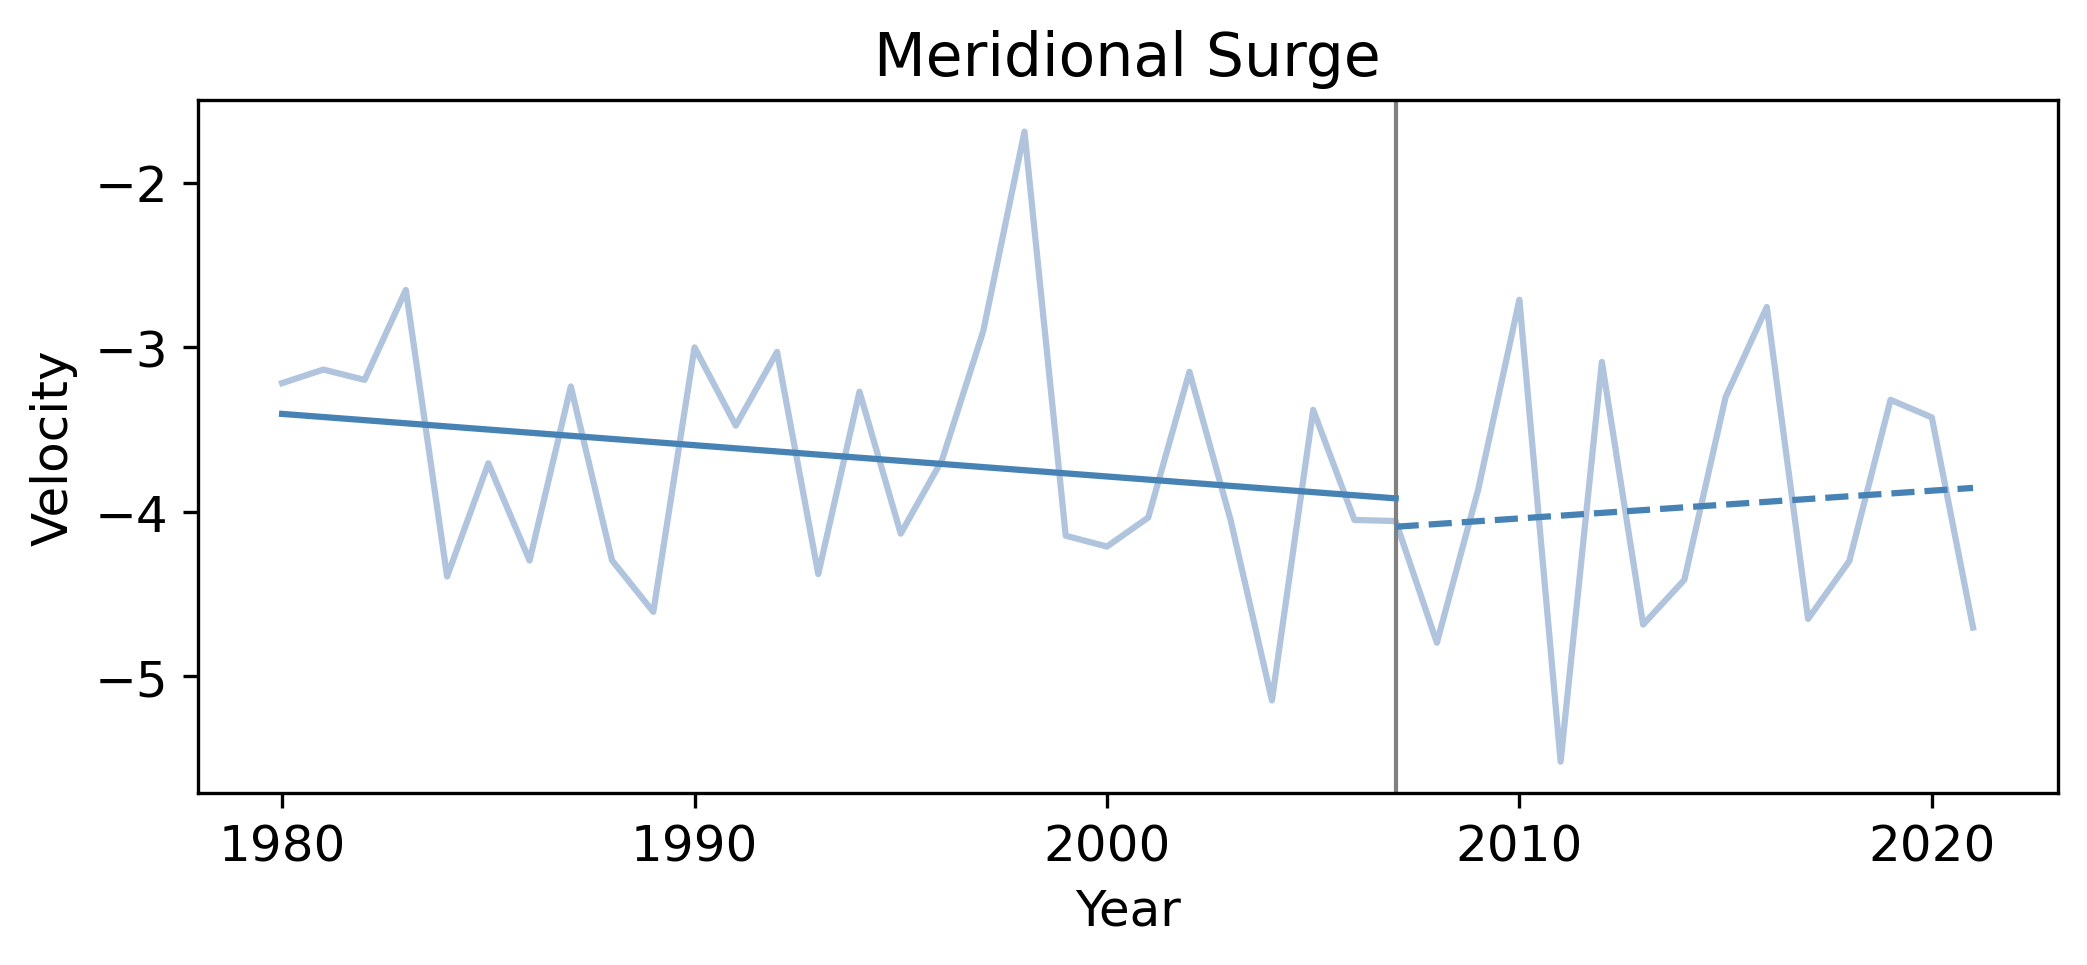

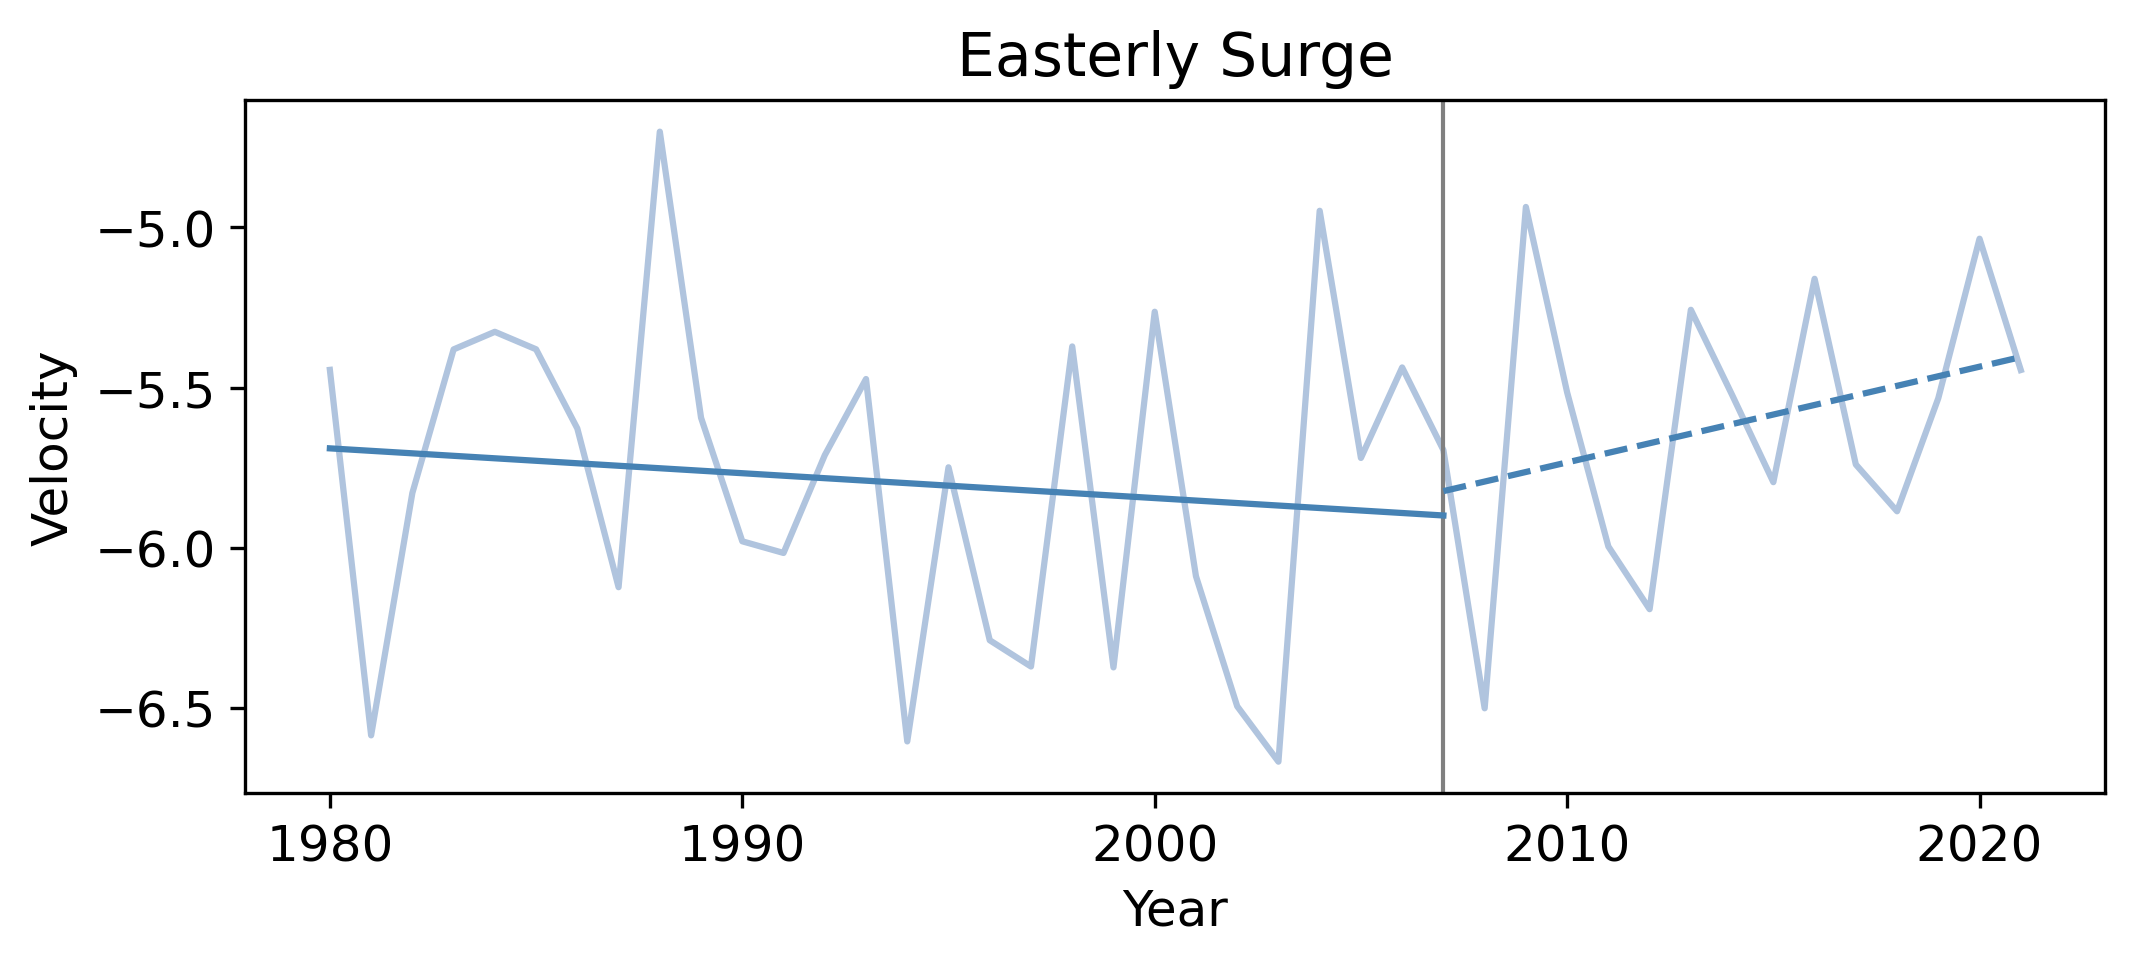

In [9]:
for surgetype, title in zip([yearlycross, yearlymerid, yearlyeasterly], ['Cross Equatorial Northerly Surge', 'Meridional Surge', 'Easterly Surge']):
    
    
    fig = plt.figure(figsize=(8,3))
    plt.plot(year, surgetype, color ='lightsteelblue')
    
    coef = np.polyfit(year, surgetype, 1)
    trendline = np.poly1d(coef)
    plt.axvline(x = 2007, color = 'grey', linewidth =1)
    
    coef = np.polyfit(year[:28], surgetype[:28],1)
    p = np.poly1d(coef)
    plt.plot(year[:28], p(year[:28]), color='steelblue')
    
    coef = np.polyfit(year[27:], surgetype[27:],1)
    p = np.poly1d(coef)
    plt.plot(year[27:], p(year[27:]), linestyle ='--', color='steelblue')
    
    plt.title(title)
    plt.xlabel('Year')
    plt.ylabel('Velocity')